## Explore Data - look at missing values in rows and columns, as well as their distributions

In [1]:
import pandas as pd
import numpy as np
import os

os.getcwd()

'C:\\dev\\safe_driver_kaggle\\sandbox'

In [2]:
temp_df = pd.read_csv("../data/train.csv")
temp_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
labels = temp_df['target']

In [4]:
from collections import Counter

In [5]:
# Let's see how our labels are distributed...
label_counter = Counter(labels)
label_counter

Counter({0: 573518, 1: 21694})

In [6]:
# strip off label and index
df = temp_df.iloc[:, 2:]
X = df.as_matrix()
X, type(X), X.shape

(array([[  2.,   2.,   5., ...,   0.,   0.,   1.],
        [  1.,   1.,   7., ...,   0.,   1.,   0.],
        [  5.,   4.,   9., ...,   0.,   1.,   0.],
        ..., 
        [  1.,   1.,  10., ...,   0.,   0.,   0.],
        [  5.,   2.,   3., ...,   1.,   0.,   0.],
        [  0.,   1.,   8., ...,   0.,   0.,   0.]]),
 numpy.ndarray,
 (595212, 57))

In [7]:
# separate good from bad entries
good_rows = X[np.all(X != -1, axis=1)]
print(good_rows.shape)
bad_rows = X[np.any(X == -1, axis=1)]
print(bad_rows.shape)

(124931, 57)
(470281, 57)


In [8]:
# From here, we can naively drop the bad rows and just use the good_rows matrix
# Let's explore the distribution of -1's in the matrix by columns
print(df.columns[0])
-1 in df.iloc[:, 0]

ps_ind_01


False

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# we know the first column has no missing values, let's count up the values we do see
col = df.iloc[:, 0]
col = col.as_matrix()

In [11]:
count_vals = Counter(col)
count_vals

Counter({0: 187594,
         1: 143984,
         2: 82468,
         3: 51193,
         4: 33524,
         5: 61464,
         6: 17682,
         7: 17303})

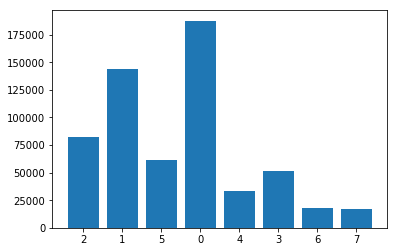

In [12]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
rect = ax.bar(np.arange(len(count_vals)), count_vals.values())
# weird bug, first label doesn't line up with the first column...
labels = ['holder']
labels.extend([key for key in count_vals.keys()])
ax.set_xticklabels(labels)
plt.show()